In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
file_path = 'train.csv'  # Ensure the file is in the same directory or specify the path
data = pd.read_csv(file_path)


In [7]:
print("Data Info:")
print(data.info())
print("\nFirst 5 rows of the dataset:")
print(data.head())
print("\nStatistical Summary:")
print(data.describe())


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

First 5 rows of the dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5    

In [9]:
# Data Cleaning
# Fill missing Age values with the median
data['Age'].fillna(data['Age'].median(), inplace=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_22500\1322906138.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)


In [11]:
# Drop the Cabin column due to high missing values
data.drop(columns=['Cabin'], inplace=True)

# Fill missing Embarked values with the mode (most common value)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Encode categorical variables: 'Sex' and 'Embarked'
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_22500\207396301.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)


C:\Users\lenovo\AppData\Local\Temp\ipykernel_22500\587878.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pclass', data=data, palette='viridis', ax=axes[0, 2])
C:\Users\lenovo\AppData\Local\Temp\ipykernel_22500\587878.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SibSp', data=data, palette='viridis', ax=axes[1, 0])
C:\Users\lenovo\AppData\Local\Temp\ipykernel_22500\587878.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Parch', data=data, palette='viridis', ax=axes[1, 1])
C:\Users\lenovo\AppData\Local\Temp\ipyk

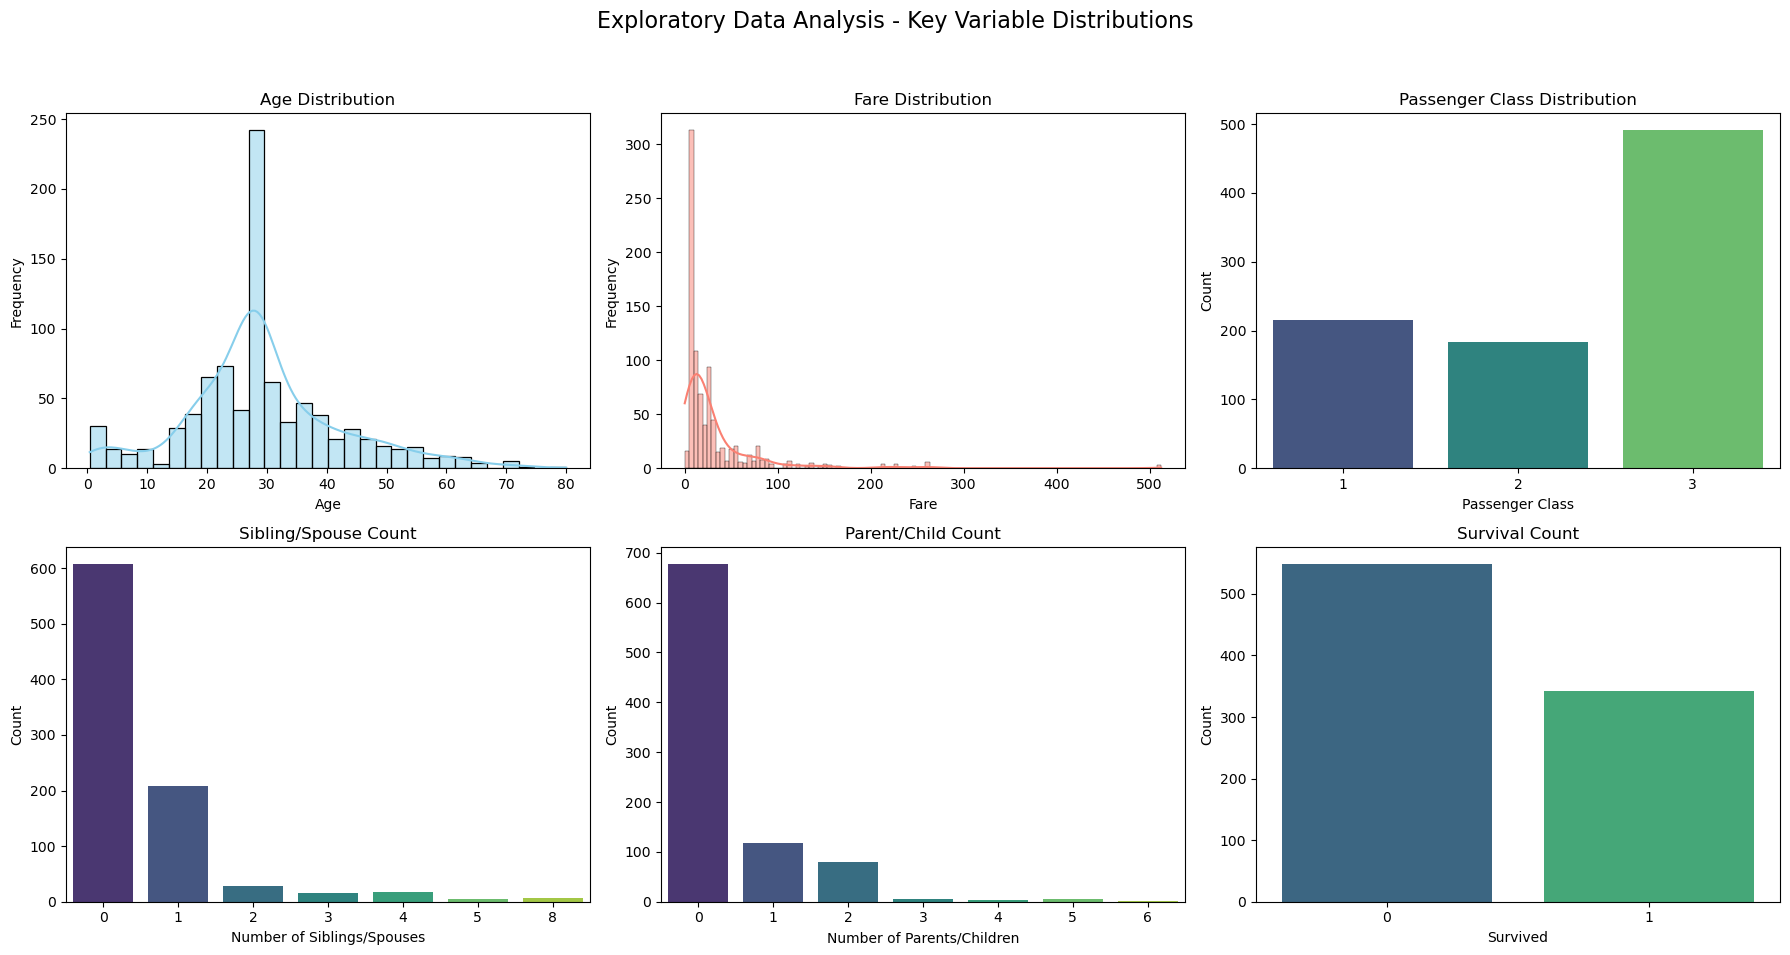

In [21]:
# Exploratory Data Analysis (EDA)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Exploratory Data Analysis - Key Variable Distributions', fontsize=16)

# Age Distribution
sns.histplot(data['Age'], kde=True, color='skyblue', ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')

# Fare Distribution
sns.histplot(data['Fare'], kde=True, color='salmon', ax=axes[0, 1])
axes[0, 1].set_title('Fare Distribution')
axes[0, 1].set_xlabel('Fare')
axes[0, 1].set_ylabel('Frequency')

# Passenger Class Distribution
sns.countplot(x='Pclass', data=data, palette='viridis', ax=axes[0, 2])
axes[0, 2].set_title('Passenger Class Distribution')
axes[0, 2].set_xlabel('Passenger Class')
axes[0, 2].set_ylabel('Count')

# Sibling/Spouse Count Distribution
sns.countplot(x='SibSp', data=data, palette='viridis', ax=axes[1, 0])
axes[1, 0].set_title('Sibling/Spouse Count')
axes[1, 0].set_xlabel('Number of Siblings/Spouses')
axes[1, 0].set_ylabel('Count')

# Parent/Child Count Distribution
sns.countplot(x='Parch', data=data, palette='viridis', ax=axes[1, 1])
axes[1, 1].set_title('Parent/Child Count')
axes[1, 1].set_xlabel('Number of Parents/Children')
axes[1, 1].set_ylabel('Count')

# Survival Count
sns.countplot(x='Survived', data=data, palette='viridis', ax=axes[1, 2])
axes[1, 2].set_title('Survival Count')
axes[1, 2].set_xlabel('Survived')
axes[1, 2].set_ylabel('Count')

# Adjust layout for a cleaner look
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adds space for main title
plt.show()


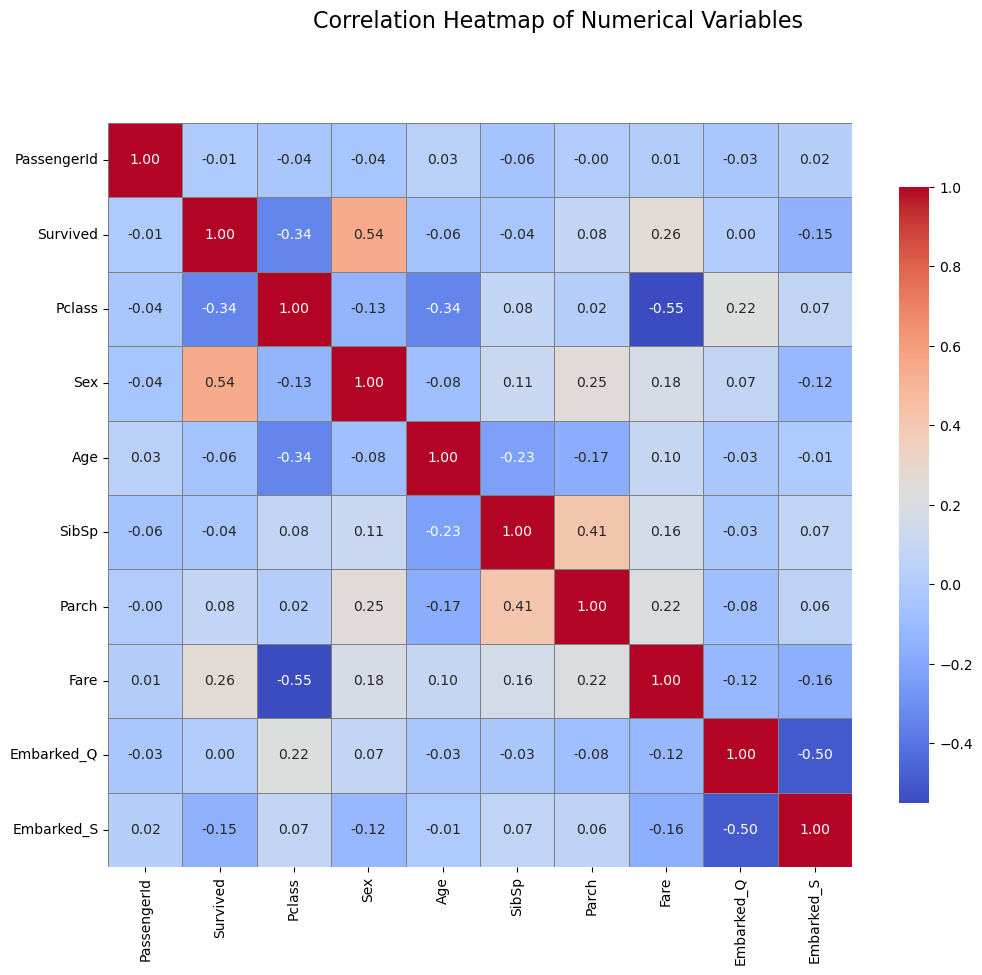

In [25]:
#Correlation Heatmap
plt.figure(figsize=(12, 10))
plt.suptitle('Correlation Heatmap of Numerical Variables', fontsize=16)

# Plot the heatmap with refined aesthetics
sns.heatmap(data.corr(numeric_only=True), 
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm', 
            cbar_kws={'shrink': 0.8}, 
            linewidths=0.5, 
            linecolor='gray',
            square=True)

plt.show()
